# Logistic Regression

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [589]:
data = pd.read_csv(os.path.join('Data', 'w_secondaryGenre.csv'))
data.head()

,id,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,primary_genres,secondary_genres,PrimarynSecondary_genres
0,26854,Young Boss,0.145000,0.986000,229669.0000,0.597000,0.000002,0.197000,-6.809000,0.308000,115.004000,0.761000,44.000000,8,1,1,['vapor trap'],rap,trap,rap/trap
1,113,4B,0.004410,0.630000,224052.0000,0.851000,0.021800,0.093900,-4.610000,0.319000,150.054000,0.573000,54.000000,1,1,1,"['brostep', 'electro house', 'electronic trap']",rap,trap,rap/trap
2,12857,Keith Ape,0.030928,0.734000,236647.0000,0.701000,0.000004,0.202000,-5.305500,0.166100,129.040000,0.339500,61.000000,9,1,2,"['korean trap', 'underground hip hop']",rap,trap,rap/trap
3,18347,Paloma Mami,0.411000,0.876000,159132.0000,0.568000,0.002740,0.187000,-5.755000,0.053300,98.027000,0.593000,74.000000,0,1,2,"['latin pop', 'reggaeton chileno', 'trap chile...",rap,trap,rap/trap
4,20074,Rich The Kid,0.104304,0.810042,194635.9167,0.640417,0.000338,0.192833,-6.649042,0.225142,132.294208,0.504083,68.208333,11,1,24,"['atl hip hop', 'hip hop', 'melodic rap', 'pop...",rap,trap,rap/trap


In [590]:
cleaned_data=data.drop(["id","artists","count","genres","popularity","primary_genres","PrimarynSecondary_genres"],axis=1)
cleaned_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,secondary_genres
0,0.145000,0.986000,229669.0000,0.597000,0.000002,0.197000,-6.809000,0.308000,115.004000,0.761000,8,1,trap
1,0.004410,0.630000,224052.0000,0.851000,0.021800,0.093900,-4.610000,0.319000,150.054000,0.573000,1,1,trap
2,0.030928,0.734000,236647.0000,0.701000,0.000004,0.202000,-5.305500,0.166100,129.040000,0.339500,9,1,trap
3,0.411000,0.876000,159132.0000,0.568000,0.002740,0.187000,-5.755000,0.053300,98.027000,0.593000,0,1,trap
4,0.104304,0.810042,194635.9167,0.640417,0.000338,0.192833,-6.649042,0.225142,132.294208,0.504083,11,1,trap


In [591]:
X = cleaned_data.drop("secondary_genres", axis=1)
y = cleaned_data["secondary_genres"]
print(X.shape, y.shape)

(700, 12) (700,)


In [592]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [593]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)

In [594]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [595]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [596]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7904761904761904
Testing Data Score: 0.7657142857142857


In [597]:
predictions = classifier.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['cool jazz' 'cool jazz' 'texas country' 'cool jazz' 'trap'
 'electro house' 'electro house' 'salsa' 'texas country' 'trap']
First 10 Actual labels: ['cool jazz', 'cool jazz', 'texas country', 'cool jazz', 'texas country', 'alternative metal', 'electro house', 'salsa', 'texas country', 'electro house']


In [598]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,cool jazz,cool jazz
1,cool jazz,cool jazz
2,texas country,texas country
3,cool jazz,cool jazz
4,trap,texas country
...,...,...
170,texas country,texas country
171,performance,performance
172,texas country,electro house
173,cool jazz,cool jazz


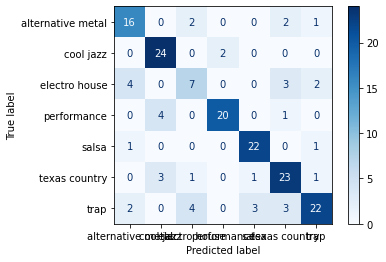

In [599]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test_scaled, y_test, cmap=plt.cm.Blues)

plt.show()

# Hyperparameter Tuning

In [439]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1','l2'],
              'C': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(classifier, param_grid, verbose=3)

In [440]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ................ C=0.0001, penalty=l2, score=0.162, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s

[CV] ................. C=0.005, penalty=l2, score=0.352, total=   0.0s
[CV] C=0.005, penalty=l2 .............................................
[CV] ................. C=0.005, penalty=l2, score=0.305, total=   0.0s


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.0005, 0.001, 0.005],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [441]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.005, 'penalty': 'l2'}
0.33142857142857146


# Random Forest

In [600]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.7314285714285714

In [601]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.8228571428571428

In [602]:
feature_names = cleaned_data.columns

In [603]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.15466722681804446, 'acousticness'),
 (0.1514583942046011, 'danceability'),
 (0.14385062961490405, 'energy'),
 (0.1209784664447276, 'valence'),
 (0.10494505915158352, 'loudness'),
 (0.10248468336882507, 'speechiness'),
 (0.06584079790415677, 'instrumentalness'),
 (0.04798841202976639, 'tempo'),
 (0.04738223000478686, 'duration_ms'),
 (0.028972311249221692, 'liveness'),
 (0.020428497873880857, 'key'),
 (0.011003291335501375, 'mode')]

# Hyperparameter Tuning

In [604]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [605]:
param_grid = {'n_estimators': n_estimators,
               
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
grid = GridSearchCV(rf, param_grid, verbose=3)

In [406]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.733, total=   0.4s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.838, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.810, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.857, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.838, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.733, total=   0.6s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.857, total=   0.6s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400, s

[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.790, total=   0.6s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.848, total=   0.6s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.857, total=   0.6s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.733, total=   0.3s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.857, total=   0.3s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200, s

[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.800, total=   0.3s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.867, total=   0.3s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.857, total=   0.3s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.743, total=   0.6s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.857, total=   0.6s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   54.7s finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             verbose=3)

In [407]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.8304761904761904


# KNN

In [606]:
from sklearn.neighbors import KNeighborsClassifier

In [607]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [608]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.709
k: 3, Train/Test Score: 0.851/0.697
k: 5, Train/Test Score: 0.821/0.726
k: 7, Train/Test Score: 0.813/0.726
k: 9, Train/Test Score: 0.813/0.709
k: 11, Train/Test Score: 0.804/0.743
k: 13, Train/Test Score: 0.810/0.743
k: 15, Train/Test Score: 0.802/0.749
k: 17, Train/Test Score: 0.796/0.754
k: 19, Train/Test Score: 0.790/0.743


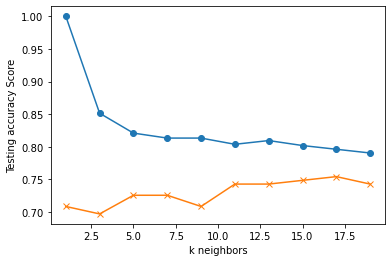

In [609]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [610]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.743


# SVM

In [611]:
X = cleaned_data.drop("secondary_genres", axis=1)
y = cleaned_data["secondary_genres"]
print(X.shape, y.shape)

(700, 12) (700,)


In [612]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [613]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [614]:
from sklearn.preprocessing import MinMaxScaler
X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)

In [615]:
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [616]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.820952380952381
Testing Data Score: 0.8114285714285714


# Hyperparameter Tuning

In [401]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [402]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.752, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.819, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.695, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.800, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.810, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.752, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=10, gamma=0.001, score=0.771, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.810, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.743, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.810, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.800, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.771, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.810, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [403]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.7866666666666667


# Neural Network

In [617]:
X = cleaned_data.drop("secondary_genres", axis=1)
y = cleaned_data["secondary_genres"]
print(X.shape, y.shape)

(700, 12) (700,)


In [618]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [619]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [620]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [621]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [622]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [623]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [624]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=12))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=7, activation='softmax'))

In [625]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [626]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 100)               1300      
_________________________________________________________________
dense_37 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_38 (Dense)             (None, 7)                 707       
Total params: 12,107
Trainable params: 12,107
Non-trainable params: 0
_________________________________________________________________


In [627]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 525 samples
Epoch 1/60
525/525 - 0s - loss: 1.8699 - accuracy: 0.3314
Epoch 2/60
525/525 - 0s - loss: 1.6815 - accuracy: 0.5048
Epoch 3/60
525/525 - 0s - loss: 1.4630 - accuracy: 0.5410
Epoch 4/60
525/525 - 0s - loss: 1.2658 - accuracy: 0.5905
Epoch 5/60
525/525 - 0s - loss: 1.1106 - accuracy: 0.6667
Epoch 6/60
525/525 - 0s - loss: 1.0070 - accuracy: 0.6971
Epoch 7/60
525/525 - 0s - loss: 0.9164 - accuracy: 0.7086
Epoch 8/60
525/525 - 0s - loss: 0.8529 - accuracy: 0.7143
Epoch 9/60
525/525 - 0s - loss: 0.8162 - accuracy: 0.7276
Epoch 10/60
525/525 - 0s - loss: 0.7758 - accuracy: 0.7390
Epoch 11/60
525/525 - 0s - loss: 0.7468 - accuracy: 0.7448
Epoch 12/60
525/525 - 0s - loss: 0.7198 - accuracy: 0.7543
Epoch 13/60
525/525 - 0s - loss: 0.7007 - accuracy: 0.7752
Epoch 14/60
525/525 - 0s - loss: 0.6915 - accuracy: 0.7600
Epoch 15/60
525/525 - 0s - loss: 0.6713 - accuracy: 0.7695
Epoch 16/60
525/525 - 0s - loss: 0.6620 - accuracy: 0.7771
Epoch 17/60
525/525 - 0s - loss: 0.6592 - ac

In [628]:
 model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

175/175 - 0s - loss: 0.8376 - accuracy: 0.7829
Normal Neural Network - Loss: 0.837621100970677, Accuracy: 0.7828571200370789


In [629]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [630]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['cool jazz' 'cool jazz' 'texas country' 'cool jazz' 'trap']
Actual Labels: ['cool jazz', 'cool jazz', 'texas country', 'cool jazz', 'texas country']


In [511]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,cool jazz,cool jazz
1,cool jazz,cool jazz
2,texas country,texas country
3,cool jazz,cool jazz
4,trap,texas country
...,...,...
170,texas country,texas country
171,performance,performance
172,texas country,electro house
173,cool jazz,cool jazz
